# Feature Selection

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
!{sys.executable} -m pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import sklearn
sklearn.__version__

'0.24.2'

In [4]:
import pandas as pd


In [5]:
#asteroid_data = pd.read_csv('pha-ml/Dataset/dataset.csv').sort_index(axis=0)

In [6]:
asteroid_data = pd.read_csv('https://www.scidrive.org/vospace-2.0/data/aa1277b6-e727-405c-9006-263fe48c4434').sort_index(axis=0)

In [7]:
asteroid_data.head(5)

id    spkid       full_name  ...     sigma_per class      rms
0  a0000001  2000001         1 Ceres  ...  9.415900e-09   MBA  0.43301
1  a0000002  2000002        2 Pallas  ...  3.680700e-06   MBA  0.35936
2  a0000003  2000003          3 Juno  ...  3.107200e-06   MBA  0.33848
3  a0000004  2000004         4 Vesta  ...  1.274900e-06   MBA  0.39980
4  a0000005  2000005       5 Astraea  ...  3.490500e-06   MBA  0.52191

[5 rows x 45 columns]

In [8]:
asteroid_data.tail(5)

id    spkid          full_name  ...   sigma_per class      rms
958519  bPLS6013  3246801         (6013 P-L)  ...  726.490000   MBA  0.23839
958520  bPLS6331  3246834         (6331 P-L)  ...    0.000016   MBA  0.53633
958521  bPLS6344  3013075         (6344 P-L)  ...    0.000091   APO  0.51556
958522  bT2S2060  3246457         (2060 T-2)  ...  503.550000   MBA  0.25641
958523  bT3S2678  3246553         (2678 T-3)  ...  106.480000   MBA  0.26980

[5 rows x 45 columns]

In [9]:
asteroid_data.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [10]:
asteroid_data.shape

(958524, 45)

In [11]:
dataframe=asteroid_data.drop(columns=['spkid','name','epoch','prefix','orbit_id','id','pha','full_name','pdes','diameter_sigma','epoch_mjd','epoch_cal','equinox','neo','sigma_e','sigma_a','sigma_q','sigma_i','sigma_om','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per','rms','per_y','moid','tp','tp_cal'])

In [12]:
dataframe.head(5)

H  diameter  albedo         e  ...         n          per     moid_ld  class
0  3.40   939.400  0.0900  0.076009  ...  0.213885  1683.145703  620.640533    MBA
1  4.20   545.000  0.1010  0.229972  ...  0.213345  1687.410992  480.348639    MBA
2  5.33   246.596  0.2140  0.256936  ...  0.226129  1592.013769  402.514639    MBA
3  3.00   525.400  0.4228  0.088721  ...  0.271609  1325.432763  443.451432    MBA
4  6.90   106.699  0.2740  0.190913  ...  0.238661  1508.414421  426.433028    MBA

[5 rows x 15 columns]

In [13]:
dataframe.tail(5)

H  diameter  albedo  ...          per     moid_ld  class
958519  17.135       NaN     NaN  ...  1258.191614  335.456367    MBA
958520  18.500       NaN     NaN  ...  1303.177916  261.227249    MBA
958521  20.400       NaN     NaN  ...  1727.085364   13.850093    APO
958522  18.071       NaN     NaN  ...  1335.311579  347.877506    MBA
958523  18.060       NaN     NaN  ...  1241.302609  264.721217    MBA

[5 rows x 15 columns]

In [14]:
dataframe.isnull().sum()



H             6263
diameter    822315
albedo      823421
e                0
a                0
q                0
i                0
om               0
w                0
ma               1
ad               4
n                0
per              4
moid_ld        127
class            0
dtype: int64

In [15]:
dataframe['class'].value_counts()

MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: class, dtype: int64

In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   H         952261 non-null  float64
 1   diameter  136209 non-null  float64
 2   albedo    135103 non-null  float64
 3   e         958524 non-null  float64
 4   a         958524 non-null  float64
 5   q         958524 non-null  float64
 6   i         958524 non-null  float64
 7   om        958524 non-null  float64
 8   w         958524 non-null  float64
 9   ma        958523 non-null  float64
 10  ad        958520 non-null  float64
 11  n         958524 non-null  float64
 12  per       958520 non-null  float64
 13  moid_ld   958397 non-null  float64
 14  class     958524 non-null  object 
dtypes: float64(14), object(1)
memory usage: 109.7+ MB


In [17]:
dataframe['diameter']=dataframe['diameter'].astype('float64')
dataframe['class']=dataframe['class'].astype('category')

In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   H         952261 non-null  float64 
 1   diameter  136209 non-null  float64 
 2   albedo    135103 non-null  float64 
 3   e         958524 non-null  float64 
 4   a         958524 non-null  float64 
 5   q         958524 non-null  float64 
 6   i         958524 non-null  float64 
 7   om        958524 non-null  float64 
 8   w         958524 non-null  float64 
 9   ma        958523 non-null  float64 
 10  ad        958520 non-null  float64 
 11  n         958524 non-null  float64 
 12  per       958520 non-null  float64 
 13  moid_ld   958397 non-null  float64 
 14  class     958524 non-null  category
dtypes: category(1), float64(14)
memory usage: 103.3 MB


In [19]:
dataframe['diameter'].fillna(dataframe.groupby('class')['diameter'].transform('median'),inplace=True)
dataframe['H'].fillna(dataframe.groupby('class')['H'].transform('median'),inplace=True)
dataframe['albedo'].fillna(dataframe.groupby('class')['albedo'].transform('median'),inplace=True)
dataframe['ma'].fillna(dataframe.groupby('class')['ma'].transform('median'),inplace=True)
dataframe['ad'].fillna(dataframe.groupby('class')['ad'].transform('median'),inplace=True)
dataframe['per'].fillna(dataframe.groupby('class')['per'].transform('median'),inplace=True)
dataframe['moid_ld'].fillna(dataframe.groupby('class')['moid_ld'].transform('median'),inplace=True)



In [20]:
dataframe.groupby('class')['diameter'].transform('median')
dataframe.head(5)

H  diameter  albedo         e  ...         n          per     moid_ld  class
0  3.40   939.400  0.0900  0.076009  ...  0.213885  1683.145703  620.640533    MBA
1  4.20   545.000  0.1010  0.229972  ...  0.213345  1687.410992  480.348639    MBA
2  5.33   246.596  0.2140  0.256936  ...  0.226129  1592.013769  402.514639    MBA
3  3.00   525.400  0.4228  0.088721  ...  0.271609  1325.432763  443.451432    MBA
4  6.90   106.699  0.2740  0.190913  ...  0.238661  1508.414421  426.433028    MBA

[5 rows x 15 columns]

In [21]:
dataframe.tail(5)

H  diameter  albedo  ...          per     moid_ld  class
958519  17.135    3.8500  0.0810  ...  1258.191614  335.456367    MBA
958520  18.500    3.8500  0.0810  ...  1303.177916  261.227249    MBA
958521  20.400    0.6025  0.1455  ...  1727.085364   13.850093    APO
958522  18.071    3.8500  0.0810  ...  1335.311579  347.877506    MBA
958523  18.060    3.8500  0.0810  ...  1241.302609  264.721217    MBA

[5 rows x 15 columns]

In [22]:
dataframe.isnull().sum()

H            0
diameter    26
albedo      26
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           4
n            0
per          4
moid_ld      0
class        0
dtype: int64

In [23]:
dataframe[['diameter','albedo','ad','per']]=dataframe[['diameter','albedo','ad','per']].fillna(value=dataframe[['diameter','albedo','ad','per']].median())

In [24]:
dataframe.isnull().sum()

H           0
diameter    0
albedo      0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
ad          0
n           0
per         0
moid_ld     0
class       0
dtype: int64

In [25]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns
#sns.set()

In [26]:
import numpy as np   
#import tensorflow as tf
#from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
mpl.rcParams['figure.figsize'] = (30, 30)
mpl.rcParams['axes.grid'] = True

In [27]:
correlation=dataframe.corr()

In [28]:
correlation

H  diameter    albedo  ...         n       per   moid_ld
H         1.000000 -0.459324  0.031089  ...  0.588762 -0.004487 -0.435391
diameter -0.459324  1.000000 -0.125696  ... -0.279425  0.013581  0.583244
albedo    0.031089 -0.125696  1.000000  ...  0.339577 -0.001070 -0.091031
e         0.344027 -0.053131  0.000836  ...  0.196245  0.012072 -0.107549
a        -0.032204  0.058647 -0.007589  ... -0.025440  0.888618  0.074082
q        -0.437553  0.585610 -0.096690  ... -0.328325  0.005505  0.995643
i        -0.097735  0.045265  0.194051  ... -0.012026  0.026036  0.043586
om        0.000835 -0.004997  0.013163  ...  0.008162 -0.001423 -0.011027
w        -0.003393  0.000563 -0.001289  ...  0.002910 -0.001237 -0.001985
ma       -0.033667  0.004867  0.008890  ... -0.006825  0.001830 -0.003235
ad       -0.024352  0.047404 -0.005674  ... -0.020299  0.983417  0.053767
n         0.588762 -0.279425  0.339577  ...  1.000000 -0.004601 -0.316103
per      -0.004487  0.013581 -0.001070  ... -0.004601  1.000000  0.005549
moid_ld  -0.435391  0.583244 -0.091031  ... -0.316103  0.005549  1.000000

[14 rows x 14 columns]

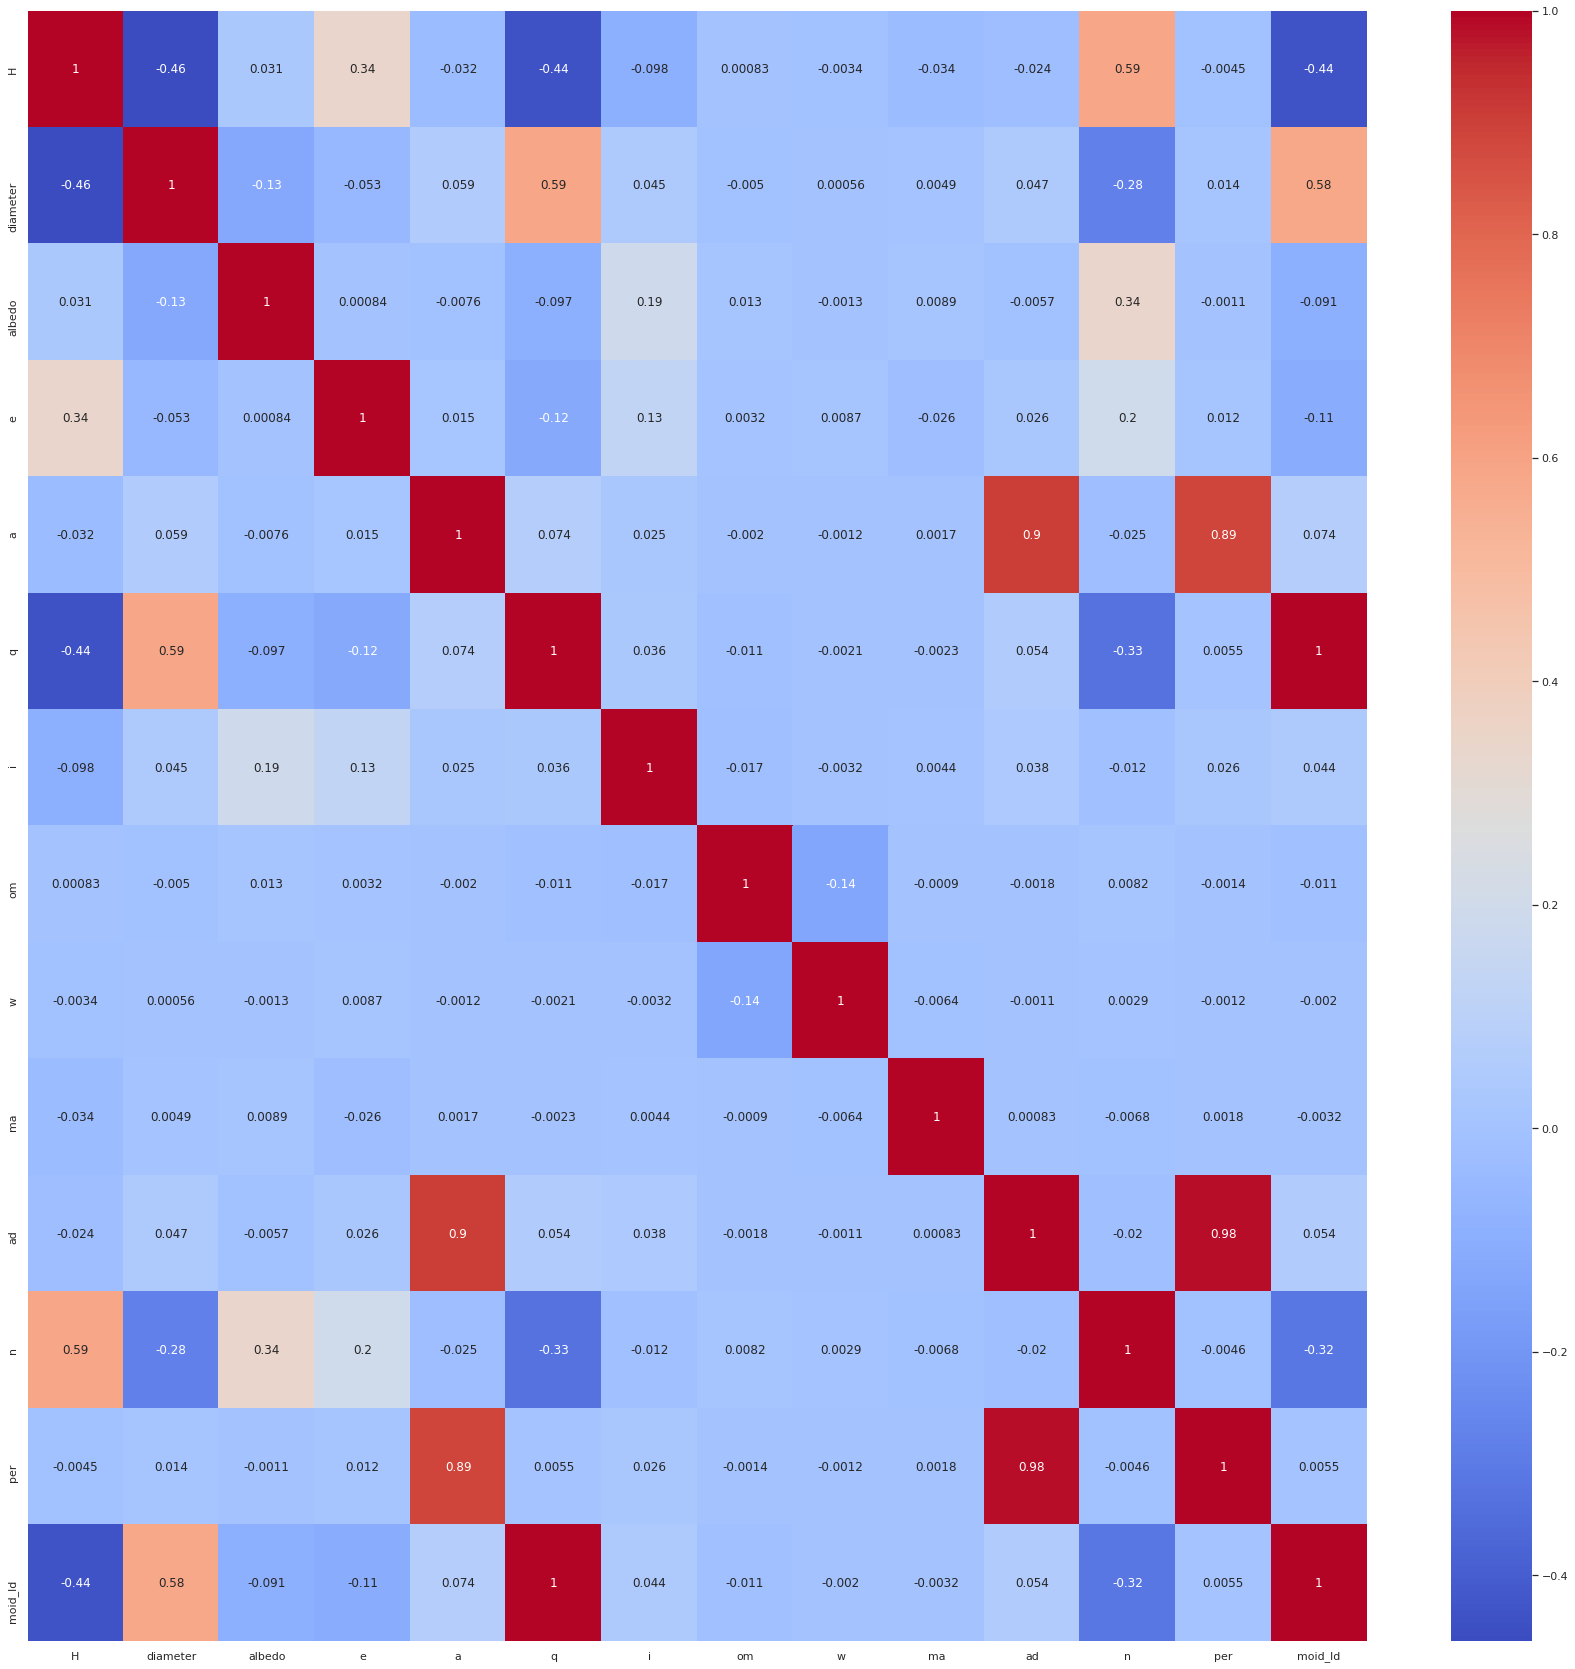

In [29]:
sns.heatmap(dataframe.corr(),cmap='coolwarm',annot=True)

In [30]:
#correlations between features
corr=dataframe.corr()
corr.style.background_gradient(cmap='PuBu')

In [31]:
abs(corr)>0.8

H  diameter  albedo      e  ...     ad      n    per  moid_ld
H          True     False   False  False  ...  False  False  False    False
diameter  False      True   False  False  ...  False  False  False    False
albedo    False     False    True  False  ...  False  False  False    False
e         False     False   False   True  ...  False  False  False    False
a         False     False   False  False  ...   True  False   True    False
q         False     False   False  False  ...  False  False  False     True
i         False     False   False  False  ...  False  False  False    False
om        False     False   False  False  ...  False  False  False    False
w         False     False   False  False  ...  False  False  False    False
ma        False     False   False  False  ...  False  False  False    False
ad        False     False   False  False  ...   True  False   True    False
n         False     False   False  False  ...  False   True  False    False
per       False     False   False  False  ...   True  False   True    False
moid_ld   False     False   False  False  ...  False  False  False     True

[14 rows x 14 columns]

In [32]:
dataframe.describe()

H       diameter  ...           per        moid_ld
count  958524.000000  958524.000000  ...  9.585240e+05  958524.000000
mean       16.906900       4.237582  ...  5.085329e+03     539.422079
std         1.785576       4.551837  ...  2.308956e+06     834.839922
min        -1.100000       0.002500  ...  1.511918e+02       0.000000
25%        16.100000       3.850000  ...  1.347739e+03     375.391728
50%        16.900000       3.850000  ...  1.572976e+03     477.717850
75%        17.700000       3.850000  ...  1.899765e+03     617.309237
max        33.200000     939.400000  ...  2.238462e+09   30929.908422

[8 rows x 14 columns]

In [33]:
df_asteroid=dataframe[['class','diameter']]

In [34]:
df_asteroid.head(5)

class  diameter
0   MBA   939.400
1   MBA   545.000
2   MBA   246.596
3   MBA   525.400
4   MBA   106.699

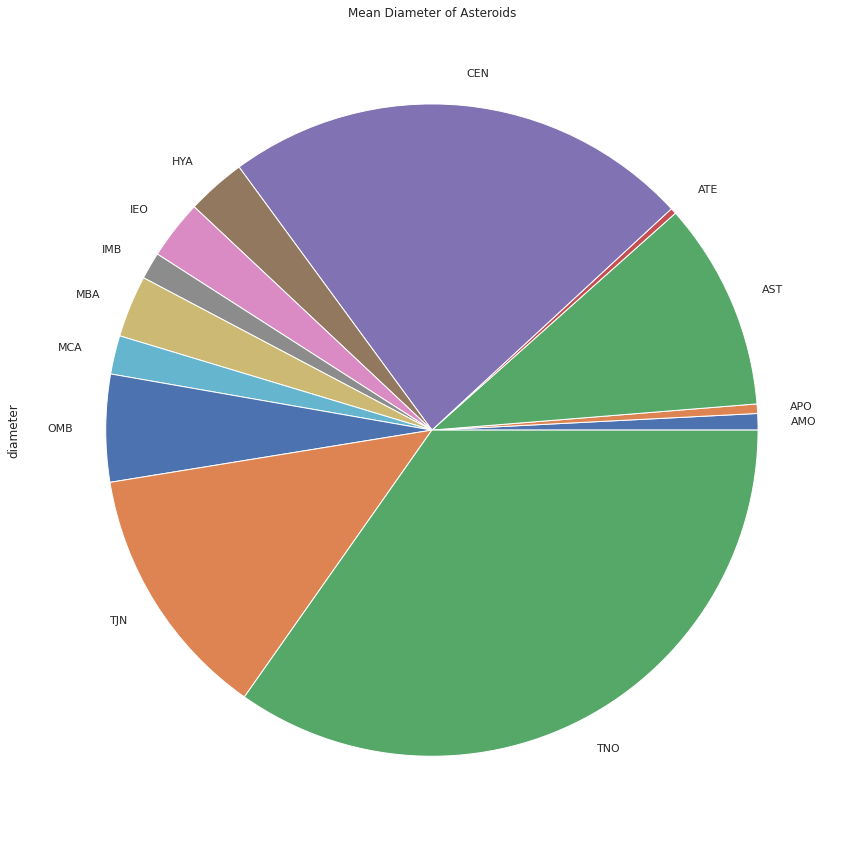

In [35]:
df_asteroid.groupby('class')['diameter'].mean().plot(kind='pie',figsize=(20,15),title='Mean Diameter of Asteroids')
plt.show()

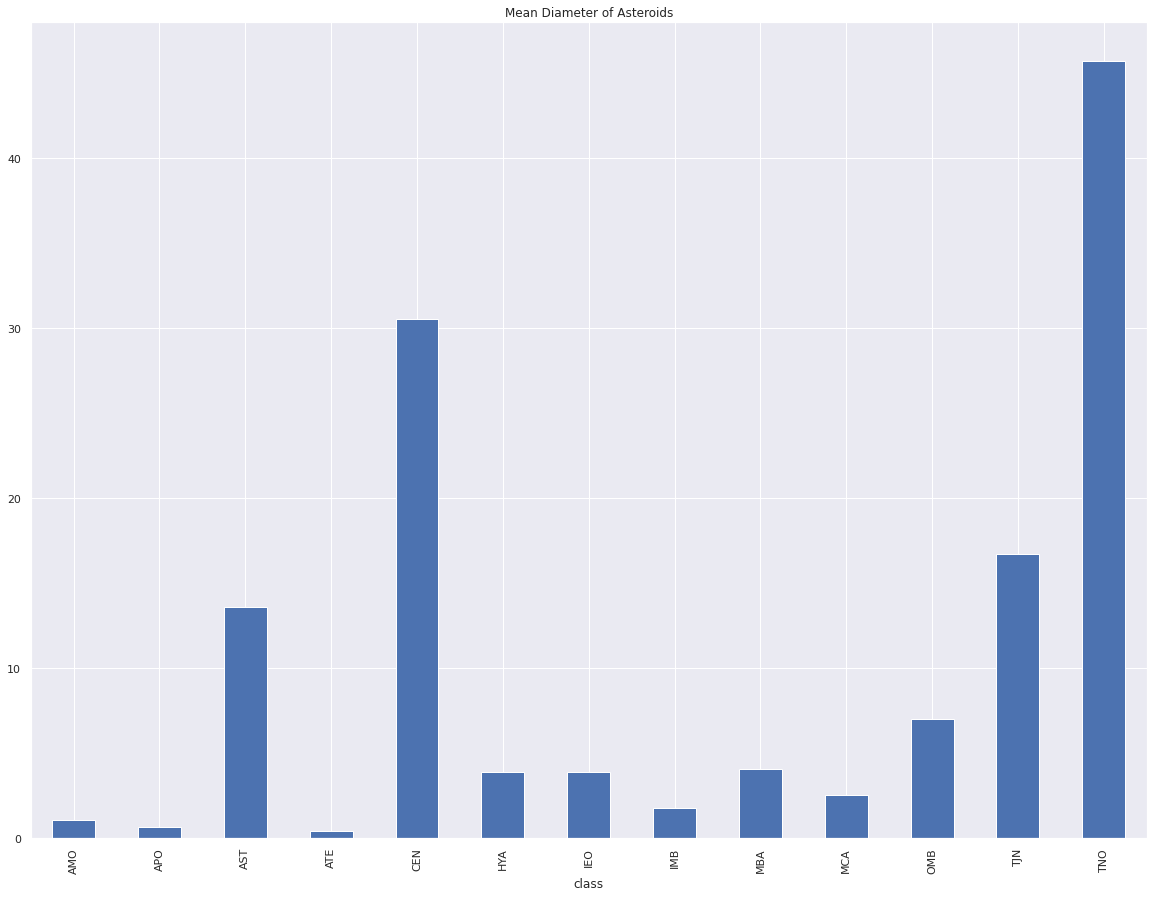

In [36]:
df_asteroid.groupby('class')['diameter'].mean().plot(kind='bar',figsize=(20,15),title='Mean Diameter of Asteroids')
plt.show()

In [37]:
dummies = pd.get_dummies(dataframe['class'])
dummies.drop(['HYA'],axis='columns',inplace=True)

In [38]:
dummies.columns

CategoricalIndex(['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA',
                  'MCA', 'OMB', 'TJN', 'TNO'],
                 categories=['AMO', 'APO', 'AST', 'ATE', 'CEN', 'HYA', 'IEO', 'IMB', ...], ordered=False, dtype='category')

In [39]:
df_final = pd.concat([dataframe,dummies],axis='columns')

In [40]:
df_final.columns

Index(['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'per', 'moid_ld', 'class', 'AMO', 'APO', 'AST', 'ATE', 'CEN',
       'IEO', 'IMB', 'MBA', 'MCA', 'OMB', 'TJN', 'TNO'],
      dtype='object')

In [41]:
df_final.drop(['class'],axis='columns',inplace=True)

In [42]:
df_final.head()

H  diameter  albedo         e         a  ...  MBA  MCA  OMB  TJN  TNO
0  3.40   939.400  0.0900  0.076009  2.769165  ...    1    0    0    0    0
1  4.20   545.000  0.1010  0.229972  2.773841  ...    1    0    0    0    0
2  5.33   246.596  0.2140  0.256936  2.668285  ...    1    0    0    0    0
3  3.00   525.400  0.4228  0.088721  2.361418  ...    1    0    0    0    0
4  6.90   106.699  0.2740  0.190913  2.574037  ...    1    0    0    0    0

[5 rows x 26 columns]

In [43]:
print(dummies.columns)
dummies.head(5)

CategoricalIndex(['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA',
                  'MCA', 'OMB', 'TJN', 'TNO'],
                 categories=['AMO', 'APO', 'AST', 'ATE', 'CEN', 'HYA', 'IEO', 'IMB', ...], ordered=False, dtype='category')


AMO  APO  AST  ATE  CEN  IEO  IMB  MBA  MCA  OMB  TJN  TNO
0    0    0    0    0    0    0    0    1    0    0    0    0
1    0    0    0    0    0    0    0    1    0    0    0    0
2    0    0    0    0    0    0    0    1    0    0    0    0
3    0    0    0    0    0    0    0    1    0    0    0    0
4    0    0    0    0    0    0    0    1    0    0    0    0

In [44]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(handle_unknown='ignore')

In [45]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()

In [46]:
#onehot_df = pd.DataFrame(onehotencoder.fit_transform(dataframe[['class']]).toarray(),columns=onehotencoder.get_feature_names())

In [47]:
label_df = pd.DataFrame(labelbinarizer.fit_transform(dataframe[['class']]),columns=pd.get_dummies(dataframe['class']).columns)

In [48]:
label_df.head(5)

AMO  APO  AST  ATE  CEN  HYA  IEO  IMB  MBA  MCA  OMB  TJN  TNO
0    0    0    0    0    0    0    0    0    1    0    0    0    0
1    0    0    0    0    0    0    0    0    1    0    0    0    0
2    0    0    0    0    0    0    0    0    1    0    0    0    0
3    0    0    0    0    0    0    0    0    1    0    0    0    0
4    0    0    0    0    0    0    0    0    1    0    0    0    0

In [49]:
dataframe['class'].unique()

['MBA', 'OMB', 'MCA', 'AMO', 'IMB', ..., 'ATE', 'AST', 'TNO', 'IEO', 'HYA']
Length: 13
Categories (13, object): ['MBA', 'OMB', 'MCA', 'AMO', ..., 'AST', 'TNO', 'IEO', 'HYA']

In [50]:
X = dataframe.drop(['class'],axis=1)

In [51]:
X.shape


(958524, 14)

In [52]:
X.columns

Index(['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'per', 'moid_ld'],
      dtype='object')

In [53]:
y = label_df

In [54]:
y.shape

(958524, 13)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
#from sklearn import preprocessing
#scaler = preprocessing.RobustScaler().fit(X)
#X_new = scaler.transform(X)
#stnd_scale = preprocessing.StandardScaler().fit(X_new)
#X_stsc = stnd_scale.transform(X_new)
#min_max = preprocessing.MinMaxScaler().fit(X_new)
#X_minmax = min_max.transform(X_new)

In [57]:
#import numpy as np
#print('Dataset mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_new),np.std(X_new)))

In [58]:
#X_data = pd.DataFrame(X_scale,columns=['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
#       'n', 'per', 'moid_ld'])

In [59]:
#X_data.shape

In [60]:
X.describe()

H       diameter  ...           per        moid_ld
count  958524.000000  958524.000000  ...  9.585240e+05  958524.000000
mean       16.906900       4.237582  ...  5.085329e+03     539.422079
std         1.785576       4.551837  ...  2.308956e+06     834.839922
min        -1.100000       0.002500  ...  1.511918e+02       0.000000
25%        16.100000       3.850000  ...  1.347739e+03     375.391728
50%        16.900000       3.850000  ...  1.572976e+03     477.717850
75%        17.700000       3.850000  ...  1.899765e+03     617.309237
max        33.200000     939.400000  ...  2.238462e+09   30929.908422

[8 rows x 14 columns]

## Multi Colinearity Remove

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [63]:
vif['Features'] = X.columns

In [64]:
vif.round(2)

VIF Factor  Features
0        60.21         H
1         2.90  diameter
2         4.21    albedo
3         4.58         e
4         5.57         a
5       240.62         q
6         3.02         i
7         3.68        om
8         4.03         w
9         3.74        ma
10       37.97        ad
11       17.49         n
12       33.13       per
13      152.49   moid_ld

In [65]:
X_VIF = X.drop(columns=['moid_ld','ad','per','om','w','ma'])
X_VIF.head(5)

H  diameter  albedo         e         a         q          i         n
0  3.40   939.400  0.0900  0.076009  2.769165  2.558684  10.594067  0.213885
1  4.20   545.000  0.1010  0.229972  2.773841  2.135935  34.832932  0.213345
2  5.33   246.596  0.2140  0.256936  2.668285  1.982706  12.991043  0.226129
3  3.00   525.400  0.4228  0.088721  2.361418  2.151909   7.141771  0.271609
4  6.90   106.699  0.2740  0.190913  2.574037  2.082619   5.367427  0.238661

In [66]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_VIF.values,i) for i in range(X_VIF.shape[1])]
vif['Features'] = X_VIF.columns
vif.round(2)

VIF Factor  Features
0       21.33         H
1        2.83  diameter
2        4.15    albedo
3        4.37         e
4        1.01         a
5        3.48         q
6        3.01         i
7       16.50         n

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_VIF, y, test_size=0.4, random_state=42)

In [68]:
print(X_train.shape)
print(X_test.shape)

(575114, 8)
(383410, 8)


In [69]:
X_test.isnull().sum()

H           0
diameter    0
albedo      0
e           0
a           0
q           0
i           0
n           0
dtype: int64

In [70]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
X_train_rb = rb.fit_transform(X_train)
X_test_rb = rb.transform(X_test)

## Multi-Colinearity Removed

In [71]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_train_rb,i) for i in range(X_train_rb.shape[1])]
vif['Features'] = X_train.columns
vif.round(2)

VIF Factor  Features
0        2.17         H
1        1.71  diameter
2        1.29    albedo
3        1.20         e
4        1.02         a
5        1.65         q
6        1.12         i
7        1.86         n

In [72]:
X_train_data = pd.DataFrame(X_train_rb,columns=X_train.columns)

In [73]:
X_train_data.describe()

H       diameter  ...             i              n
count  575114.000000  575114.000000  ...  5.751140e+05  575114.000000
mean        0.002326       0.391012  ...  1.991733e-01       0.100651
std         1.117064       4.585470  ...  8.040520e-01       1.024985
min       -11.250000      -3.842000  ... -8.987107e-01      -2.948699
25%        -0.500000       0.000000  ... -3.937989e-01      -0.507442
50%         0.000000       0.000000  ...  5.386431e-17       0.000000
75%         0.500000       0.000000  ...  6.062011e-01       0.492558
max        10.187500     896.150000  ...  2.006841e+01      27.728720

[8 rows x 8 columns]

# SGD Clasiifier

In [81]:
from sklearn.multiclass import OneVsRestClassifier

In [82]:
from sklearn.linear_model import SGDClassifier

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
sgd = SGDClassifier(loss='log',random_state=40)

In [87]:
ovr_sgd = OneVsRestClassifier(sgd)

In [ ]:
scores_sgd_accuracy = cross_val_score(ovr_sgd,X_train_data,y_train,cv=10,scoring='accuracy',n_jobs=-1)

In [ ]:
print('SGD accuracy',scores_sgd_accuracy.mean())

0.9213634119524302


In [88]:
from sklearn.metrics import precision_score, make_scorer

In [89]:
precision = make_scorer(precision_score,average='weighted')

In [90]:
scores_sgd_precision = cross_val_score(ovr_sgd,X_train_data,y_train,cv=10,scoring=precision,n_jobs=-1)

In [91]:
print('SGD precision',scores_sgd_precision.mean())

SGD precision 0.9367307651004738


In [92]:
from sklearn.metrics import recall_score

In [93]:
recall = make_scorer(recall_score,average='weighted')

In [94]:
scores_sgd_recall = cross_val_score(ovr_sgd,X_train_data,y_train,cv=10,scoring=recall,n_jobs=-1)

In [95]:
print('SGD recall',scores_sgd_recall.mean())

SGD recall 0.9371533291245349


In [96]:
scores_sgd_f1 = cross_val_score(ovr_sgd,X_train_data,y_train,cv=10,scoring='f1_weighted',n_jobs=-1)

In [99]:
print('SGD f1',scores_sgd_f1.mean())

SGD f1 0.932291679082916
